INCIDENTNEIGHBORHOOD
Central Business District    3778
South Side Flats             3185
Carrick                      2198
East Allegheny               2008
Homewood South               1939
                             ... 
Ridgemont                      35
Central Northside              23
Mt. Oliver Boro                18
Troy Hill-Herrs Island          6
Mt. Oliver Neighborhood         2
Length: 98, dtype: int64

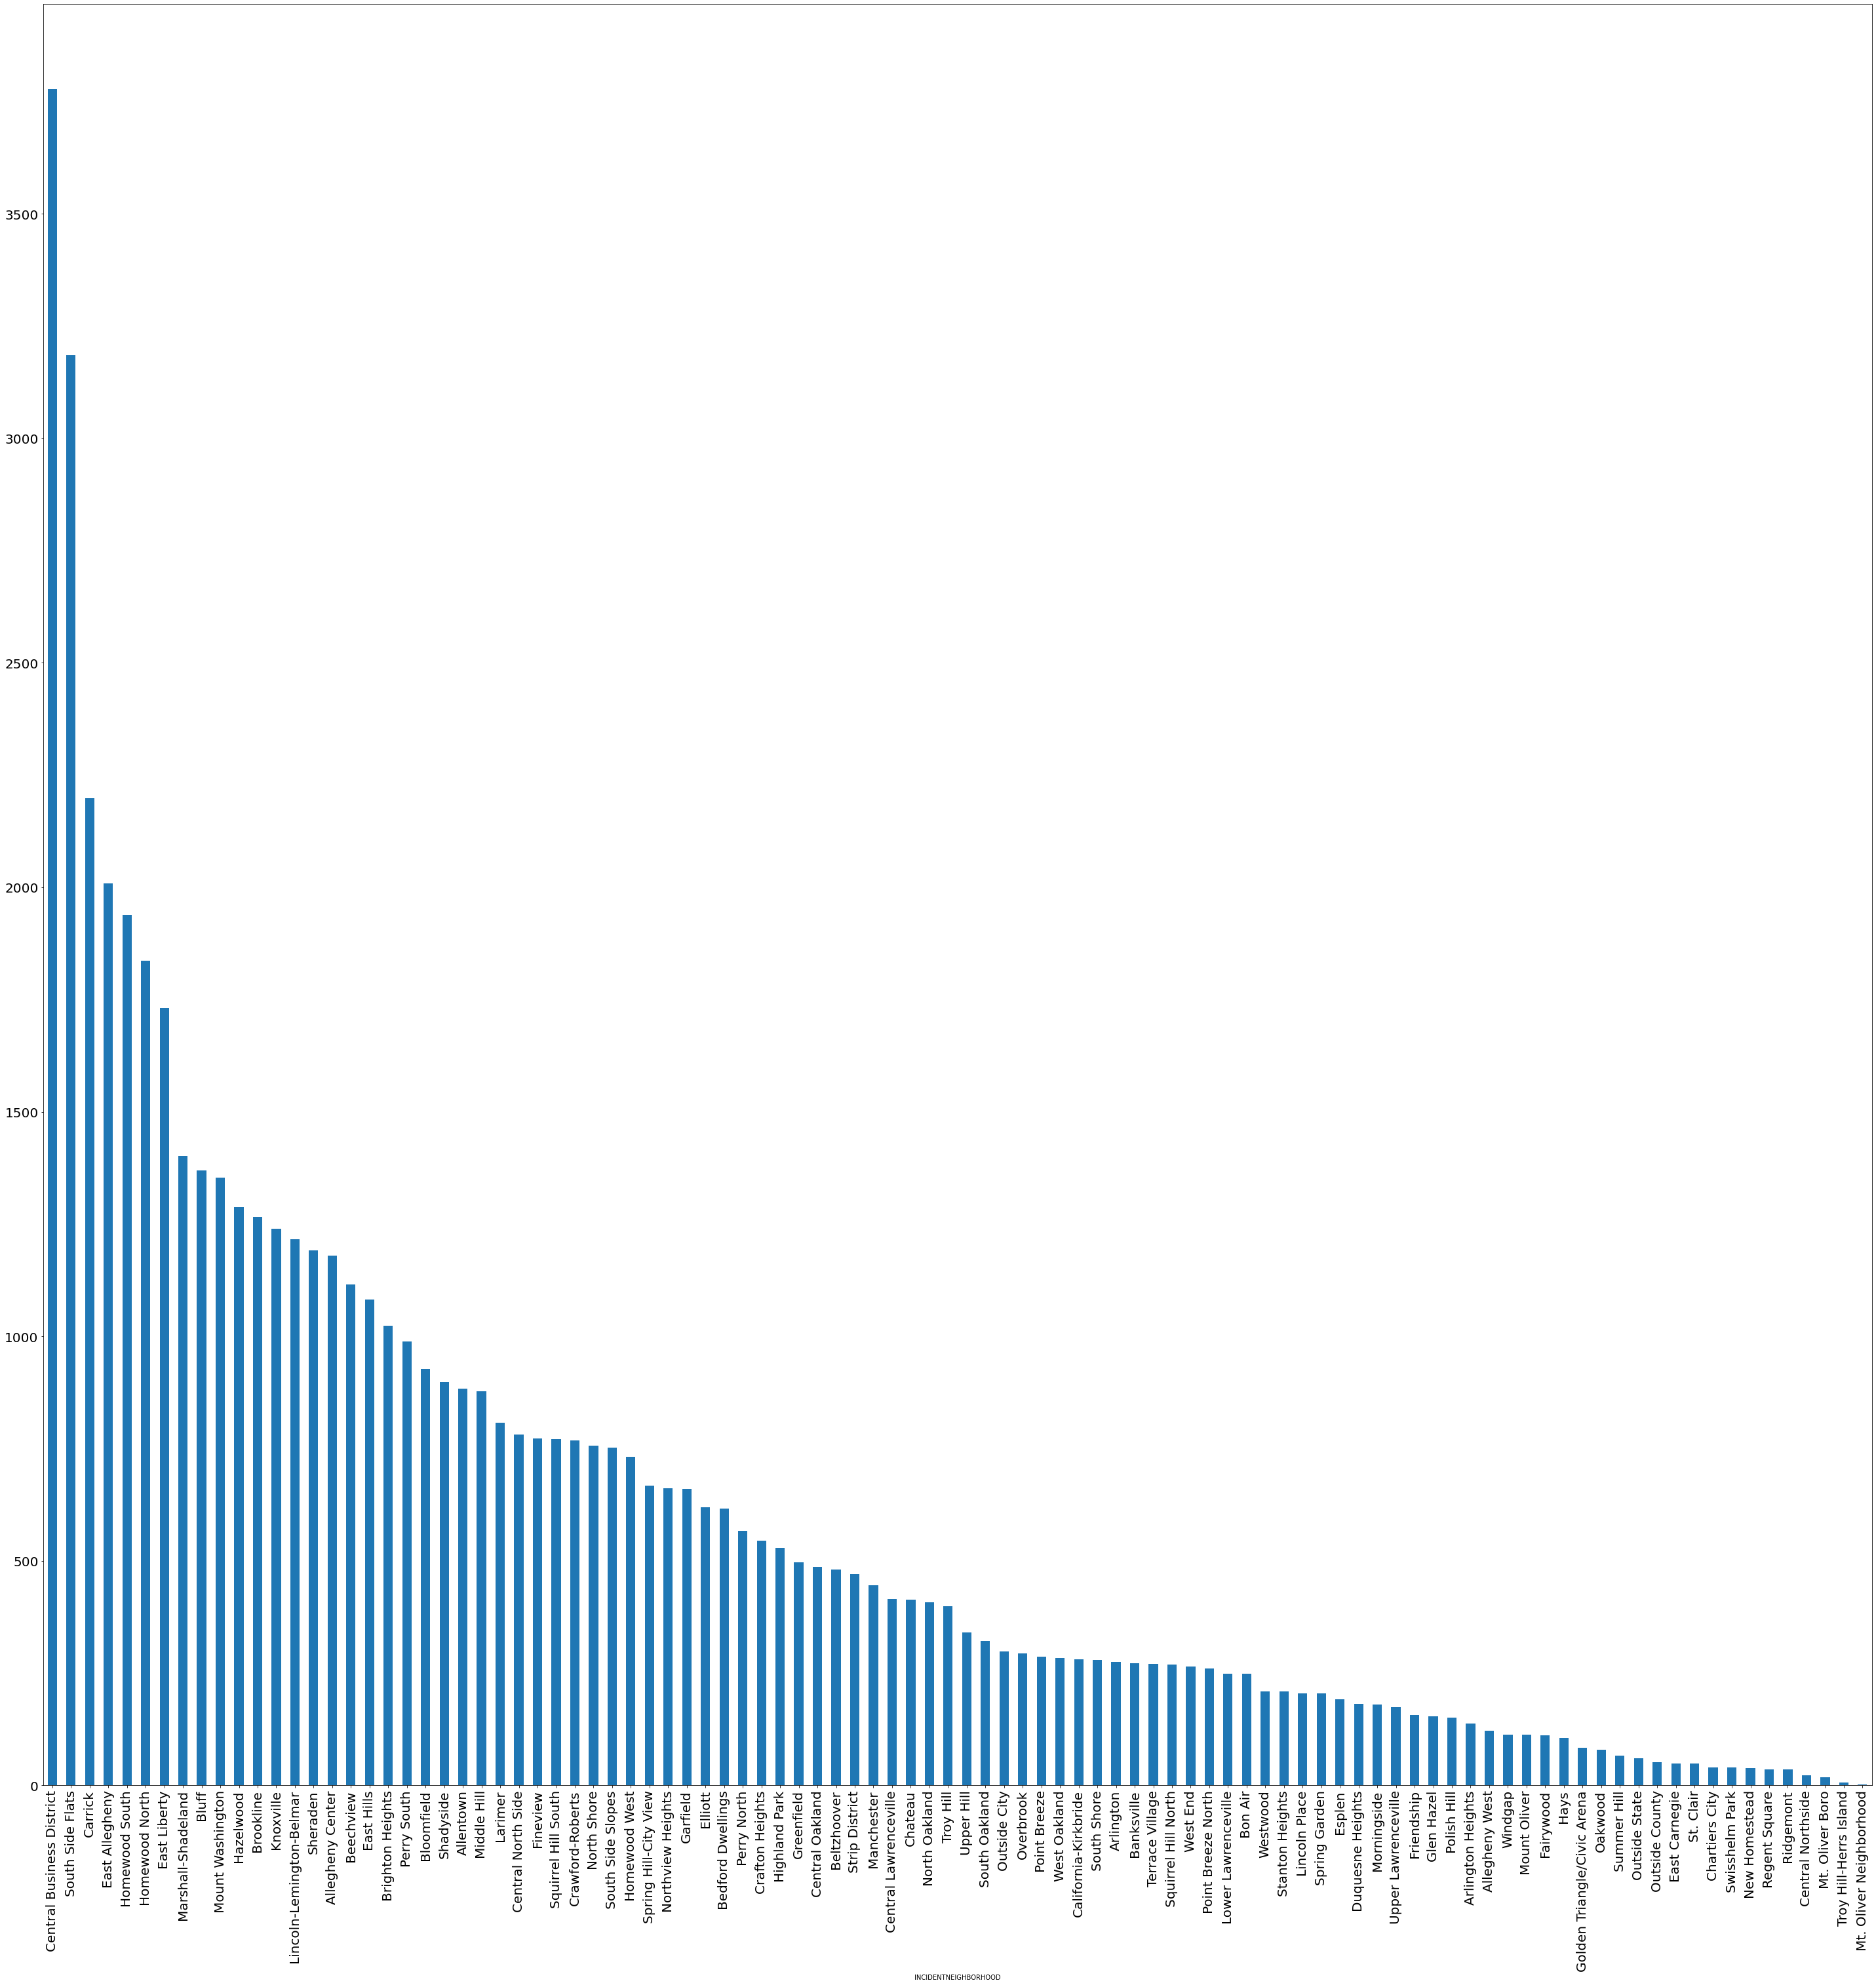

In [51]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

police = pd.read_csv("arrests.csv")

neighborhood_data  = police.groupby('INCIDENTNEIGHBORHOOD').size().sort_values(ascending=False)

neighborhood_data.plot.bar(figsize=(50, 50))

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

query_mask = police['INCIDENTNEIGHBORHOOD'] == "Mt. Oliver Neighborhood"
quantity1 = police[query_mask]
quantity1.head()

neighborhood_data

## Introduction: 

For this project we had to create a broad metric to measure which county in Pittsburgh is best. Our group decided to focus on overall safety as our measurement. I decided to focus specifically on Arrest Data per neighborhood. We believed that the best neighborhood to live in would be the one that is in fact safest to live in. I decided that the safety of a neighborhood would be determined by the arrest data because this allows us to see more information about the specific people living in a neighborhood and how often they are getting arrested. 

## The Metric: 

My metric is comprised of an Arrest Data set that compiled all arrests from each neighborhood. From here i was able to count which neighborhoods had the least number of arrests and use this information to determine that that neighborhood (Mt. Oliver Neighborhood), was the safest and therefore best neighborhood to live in. 

## The Best Neighborhood: 

In order to determine the "best neighborhood", I ordered my data from most arrests to fewest arrests. Since I am focused on the safest neighborhood, the neighborhood with the least arrests would be the best neighborhood. After I organized the data by arrests per neighborhood (as shown above in a bar graph and below in a map), I found out that the best neighborhood is Mr. Oliver Neighborhood as it only has 2 reports of arrests. 

## Conclusion: 

According to Arrest Data, Mt Oliver Neighborhood is the best neighborhood. This is different from my personal favorite neighborhood, Point Breeze. Living in Point Breeze means that Frick Park, Bakery Square, the Squirrel Hill shopping district, etc are all in walking distance. Having all of these be accessible without having to worry about car traffic is an amazing bonus to this neighborhood and why it is my personal favorite. 

INCIDENTNEIGHBORHOOD
Mt. Oliver Neighborhood    2
dtype: int64

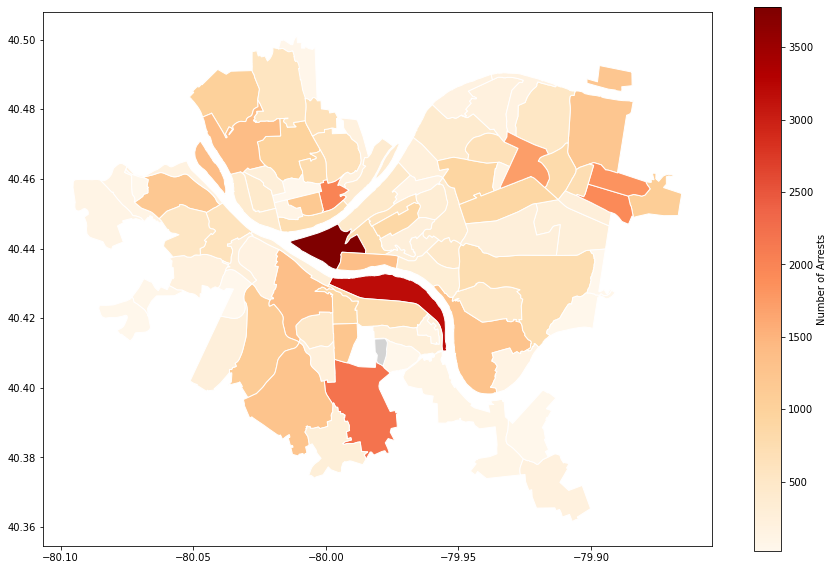

In [4]:
import pandas as pd
import geopandas
%matplotlib inline

# import dataset
police = pd.read_csv("arrests.csv")
neighborhood_data  = police.groupby('INCIDENTNEIGHBORHOOD').size().sort_values(ascending=True)

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile

# do the merge
arrests_map = neighborhoods.merge(neighborhood_data.rename('new'), how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')

# look at the head to confirm it merged correctly
arrests_map[['hood','new','geometry']].head()

arrests_map.plot(column='new', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Arrests"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )
neighborhood_data.head(1)